In [85]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import math
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import os
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime,HeatMap
#!pip install git+https://github.com/python-visualization/folium

In [86]:
cdata_19=pd.read_csv('Crimes_-_2019.csv')
cdata_18=pd.read_csv('Crimes_-_2018.csv')
pdata=pd.read_csv('Police_Stations.csv')

In [87]:
cdata_18.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11903290,JC508826,01/01/2018 08:00:00 AM,085XX S ESCANABA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,10.0,46.0,17,NaN,NaN,2018,11/26/2019 03:51:26 PM,NaN,NaN,NaN
1,11902580,JC524113,09/01/2018 06:00:00 AM,094XX S MICHIGAN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,9.0,49.0,26,NaN,NaN,2018,11/26/2019 03:51:26 PM,NaN,NaN,NaN
2,11516628,JB528220,11/24/2018 08:45:00 PM,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,True,False,...,7.0,51.0,02,1188521.0,1842119.0,2018,11/26/2019 03:47:51 PM,41.721844,-87.585072,"(41.721843846, -87.585071938)"
3,11491979,JB495848,08/27/2018 12:00:00 PM,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,True,False,...,21.0,73.0,10,1173264.0,1843551.0,2018,11/26/2019 03:47:51 PM,41.726124,-87.640913,"(41.726123768, -87.640913299)"
4,11895996,JC516056,04/01/2018 12:00:00 AM,003XX W CHESTNUT ST,0810,THEFT,OVER $500,APARTMENT,False,False,...,27.0,8.0,06,NaN,NaN,2018,11/25/2019 03:51:39 PM,NaN,NaN,NaN


In [88]:
cdata_19.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11889339,JC507601,11-12-19 12:15,025XX W 62ND ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,16.0,66.0,08B,1160532.0,1863463.0,2019,11/19/2019 03:57:06 PM,41.781037,-87.687004,"(41.781036889, -87.687003863)"
1,11893558,JC513193,11-09-19 18:00,011XX E 83RD ST,820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,8.0,45.0,6,1185243.0,1850189.0,2019,11/19/2019 03:53:49 PM,41.744066,-87.596826,"(41.744066365, -87.596825618)"
2,11889659,JC508257,11-12-19 18:45,003XX E BENTON PL,2820,OTHER OFFENSE,TELEPHONE THREAT,SMALL RETAIL STORE,False,False,...,42.0,32.0,08A,1178860.0,1901675.0,2019,11/19/2019 03:57:06 PM,41.885496,-87.618644,"(41.885495793, -87.618644375)"
3,11891583,JC510501,11-04-19 20:09,020XX S MORGAN ST,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,APARTMENT,False,False,...,25.0,31.0,10,1170009.0,1890437.0,2019,11/19/2019 03:53:49 PM,41.854856,-87.651474,"(41.854855548, -87.651474466)"
4,11890017,JC508355,11-12-19 21:14,040XX S CALIFORNIA AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,12.0,58.0,08A,1158367.0,1877548.0,2019,11/19/2019 03:57:06 PM,41.819732,-87.694558,"(41.819732387, -87.694557506)"


In [89]:
cdata_18.shape

(267639, 22)

In [90]:
cdata_19.shape

(224412, 22)

In [91]:
#merge=cdata.merge(pdata,how='inner',left_on=['District'],right_on=['District'])
#Task 2
#merge=pd.merge(cdata,pdata,how='inner', left_on=['District'],right_on=['District'])
cdata=pd.concat([cdata_18,cdata_19]).reset_index()

In [92]:
cdata.shape

(492051, 23)

In [93]:
cdata.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,11903290,JC508826,01/01/2018 08:00:00 AM,085XX S ESCANABA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,10.0,46.0,17,NaN,NaN,2018,11/26/2019 03:51:26 PM,NaN,NaN,NaN
1,1,11902580,JC524113,09/01/2018 06:00:00 AM,094XX S MICHIGAN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,9.0,49.0,26,NaN,NaN,2018,11/26/2019 03:51:26 PM,NaN,NaN,NaN
2,2,11516628,JB528220,11/24/2018 08:45:00 PM,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,True,...,7.0,51.0,02,1188521.0,1842119.0,2018,11/26/2019 03:47:51 PM,41.721844,-87.585072,"(41.721843846, -87.585071938)"
3,3,11491979,JB495848,08/27/2018 12:00:00 PM,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,True,...,21.0,73.0,10,1173264.0,1843551.0,2018,11/26/2019 03:47:51 PM,41.726124,-87.640913,"(41.726123768, -87.640913299)"
4,4,11895996,JC516056,04/01/2018 12:00:00 AM,003XX W CHESTNUT ST,0810,THEFT,OVER $500,APARTMENT,False,...,27.0,8.0,06,NaN,NaN,2018,11/25/2019 03:51:39 PM,NaN,NaN,NaN


In [94]:
pdata.head()

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"
1,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
2,6,Gresham,7808 S Halsted St,Chicago,IL,60620,http://home.chicagopolice.org/community/distri...,312-745-3617,312-745-3649,312-745-3639,1172283.013,1853022.646,41.752137,-87.644229,"(41.7521368378, -87.6442289066)"
3,11,Harrison,3151 W Harrison St,Chicago,IL,60612,http://home.chicagopolice.org/community/distri...,312-746-8386,312-746-4281,312-746-5151,1155244.069,1897148.755,41.873582,-87.705488,"(41.8735822883, -87.705488126)"
4,16,Jefferson Park,5151 N Milwaukee Ave,Chicago,IL,60630,http://home.chicagopolice.org/community/distri...,312-742-4480,312-742-4421,312-742-4423,1138480.758,1933660.473,41.974094,-87.766149,"(41.9740944511, -87.7661488432)"


In [95]:
pdata=pdata.drop(columns=['ADDRESS','CITY','STATE','ZIP','WEBSITE','PHONE','FAX','TTY','LOCATION'])

In [96]:
cdata.nunique()

index                   267639
ID                      492051
Case Number             492007
Date                    233022
Block                    30852
IUCR                       423
Primary Type                32
Description                315
Location Description       137
Arrest                       2
Domestic                     2
Beat                       274
District                    23
Ward                        50
Community Area              78
FBI Code                    32
X Coordinate             57981
Y Coordinate             88263
Year                         2
Updated On                1439
Latitude                232807
Longitude               232764
Location                189633
dtype: int64

In [97]:
pdata.head()

,DISTRICT,DISTRICT NAME,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
0,Headquarters,Headquarters,1177731.401,1881697.404,41.830702,-87.623395
1,1,Central,1176569.052,1891771.704,41.858373,-87.627356
2,6,Gresham,1172283.013,1853022.646,41.752137,-87.644229
3,11,Harrison,1155244.069,1897148.755,41.873582,-87.705488
4,16,Jefferson Park,1138480.758,1933660.473,41.974094,-87.766149


In [98]:
pdata.rename(columns={'DISTRICT':'District','DISTRICT NAME':'p_dname','X COORDINATE':'p_x','Y COORDINATE':'p_y','LATITUDE':'p_latitude','LONGITUDE':'p_longitude'},inplace=True)

In [99]:
pdata.head()
pdata=pdata[pdata.District!='Headquarters']

In [100]:
#No of arrests and non arrests
cdata['Arrest'].value_counts()

False    391229
True     100822
Name: Arrest, dtype: int64

In [101]:
#Count of each type of crime
cdata['Primary Type'].value_counts()

THEFT                                118793
BATTERY                               93202
CRIMINAL DAMAGE                       51276
ASSAULT                               38551
DECEPTIVE PRACTICE                    34293
OTHER OFFENSE                         31796
NARCOTICS                             25611
BURGLARY                              20010
MOTOR VEHICLE THEFT                   17744
ROBBERY                               16530
CRIMINAL TRESPASS                     12902
WEAPONS VIOLATION                     10979
OFFENSE INVOLVING CHILDREN             4273
CRIM SEXUAL ASSAULT                    3015
PUBLIC PEACE VIOLATION                 2754
INTERFERENCE WITH PUBLIC OFFICER       2677
SEX OFFENSE                            2199
PROSTITUTION                           1294
HOMICIDE                               1039
ARSON                                   692
LIQUOR LAW VIOLATION                    479
STALKING                                399
CONCEALED CARRY LICENSE VIOLATIO

In [102]:
#Find missing values
cdata.isnull().sum()

index                      0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1748
Arrest                     0
Domestic                   0
Beat                       0
District                   2
Ward                      15
Community Area             5
FBI Code                   0
X Coordinate            5241
Y Coordinate            5241
Year                       0
Updated On                 0
Latitude                5241
Longitude               5241
Location                5241
dtype: int64

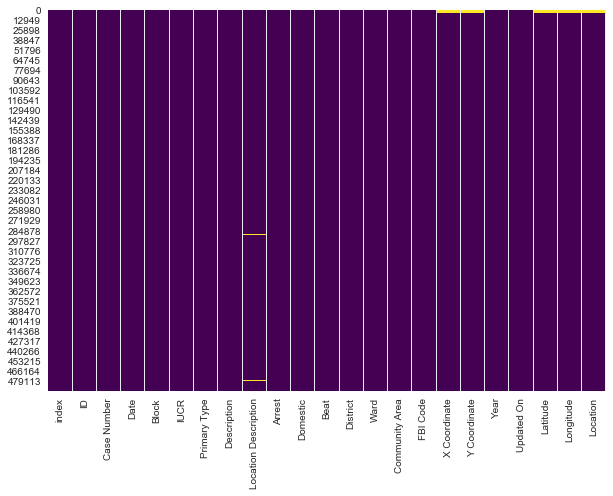

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(cdata.isnull(), cbar = False, cmap = 'viridis')

Text(0.5, 1, 'Crime Distribution per District')

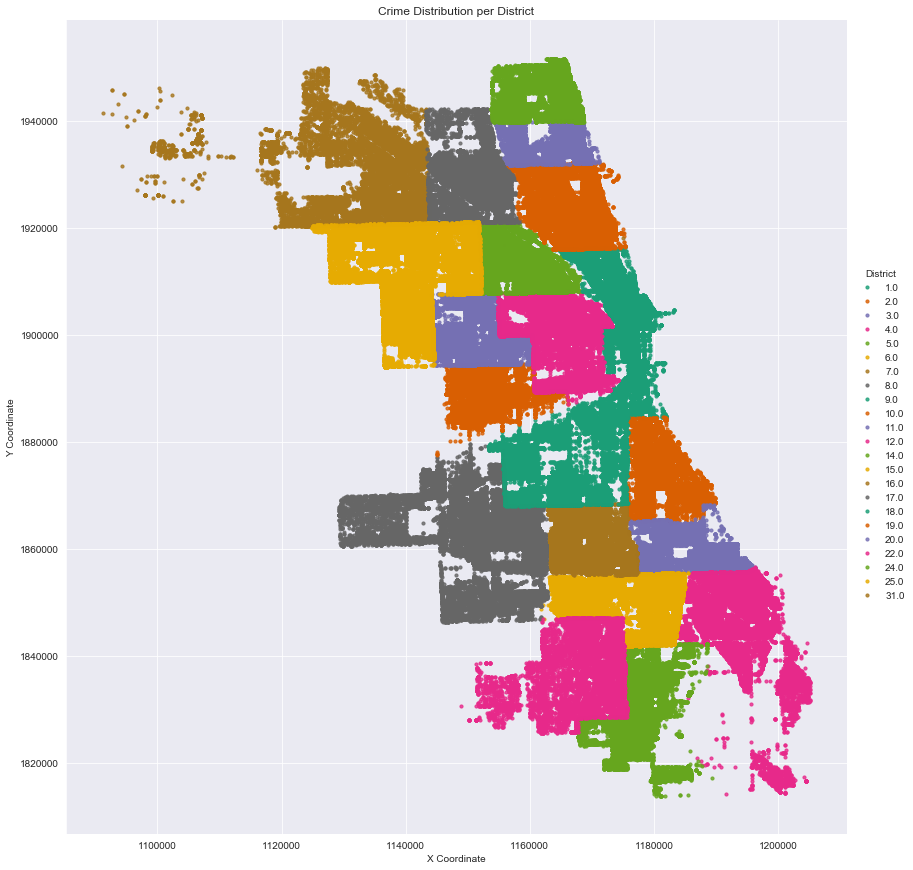

In [104]:
cdata = cdata.loc[(cdata['X Coordinate']!=0)]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=cdata[:],
           fit_reg=False, 
           hue="District", #District
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crime Distribution per District")

In [105]:
#Dropping rows with null values
cdata=cdata[pd.notnull(cdata['Location Description'])]
cdata=cdata[pd.notnull(cdata['District'])]
cdata=cdata[pd.notnull(cdata['Ward'])]
cdata=cdata[pd.notnull(cdata['X Coordinate'])]
cdata=cdata[pd.notnull(cdata['Community Area'])]

In [106]:
cdata.isnull().sum()

index                   0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [107]:
cdata.iloc[:5,[20,21]]

,Latitude,Longitude
2,41.721844,-87.585072
3,41.726124,-87.640913
5,41.770428,-87.628300
6,41.992509,-87.660344
9,41.765884,-87.693061


In [108]:
chicago = [41.85, -87.68]
m = folium.Map(location=chicago, zoom_start=9.5,control_scale = False)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
folium.Choropleth(
    geo_data='chicago_police_districts.geojson',
    name='Choropleth',
    data=cdata,
    #data=cdata[cdata['Primary Type']=='ASSAULT'].dropna(),
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Arrests',
    highlight=True
    ).add_to(m)
m.add_child(plugins.HeatMap(cdata.iloc[:,[20,21]],
                            name='Assault',
                            radius=5,
                            max_zoom=4,
                            blur=10
                            ))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

C:\Users\SNEHAL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



In [109]:
cdata['District'] = cdata.District.astype(int)
pdata['District'] = pdata.District.astype(int)

In [110]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 22
Data columns (total 6 columns):
District       22 non-null int32
p_dname        22 non-null object
p_x            22 non-null float64
p_y            22 non-null float64
p_latitude     22 non-null float64
p_longitude    22 non-null float64
dtypes: float64(4), int32(1), object(1)
memory usage: 1.1+ KB


In [111]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485419 entries, 2 to 492050
Data columns (total 23 columns):
index                   485419 non-null int64
ID                      485419 non-null int64
Case Number             485419 non-null object
Date                    485419 non-null object
Block                   485419 non-null object
IUCR                    485419 non-null object
Primary Type            485419 non-null object
Description             485419 non-null object
Location Description    485419 non-null object
Arrest                  485419 non-null bool
Domestic                485419 non-null bool
Beat                    485419 non-null int64
District                485419 non-null int32
Ward                    485419 non-null float64
Community Area          485419 non-null float64
FBI Code                485419 non-null object
X Coordinate            485419 non-null float64
Y Coordinate            485419 non-null float64
Year                    485419 non-null int64
U

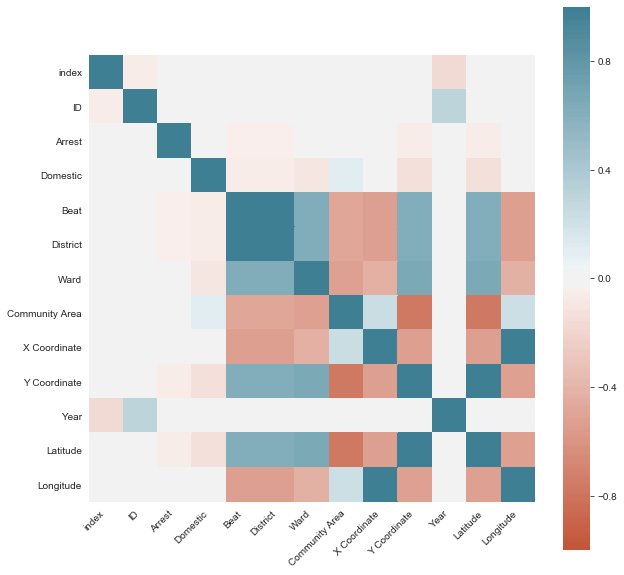

In [112]:
corr = cdata.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [113]:
cdata.shape

(485419, 23)

In [114]:
pdata.shape

(22, 6)

In [115]:
pdata['District'].unique()
#

array([ 1,  6, 11, 16, 24,  2,  7, 25, 10, 15,  3, 19, 14,  8,  4, 20, 18,
       12,  9, 22,  5, 17], dtype=int64)

In [116]:
cdata['District'].unique()

array([ 4, 22,  7, 24,  8,  2, 18, 15,  9, 12,  1, 25,  3, 11, 14, 16, 10,
        6, 19, 17, 31,  5, 20], dtype=int64)

In [117]:
cdata[cdata["District"]==31].count()

index                   10
ID                      10
Case Number             10
Date                    10
Block                   10
IUCR                    10
Primary Type            10
Description             10
Location Description    10
Arrest                  10
Domestic                10
Beat                    10
District                10
Ward                    10
Community Area          10
FBI Code                10
X Coordinate            10
Y Coordinate            10
Year                    10
Updated On              10
Latitude                10
Longitude               10
Location                10
dtype: int64

In [118]:
cdata.loc[cdata['District']==31]

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
177,177,11513541,JB524308,08/01/2018 12:01:00 AM,037XX S HERMITAGE AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,...,12.0,59.0,02,1124178.0,1931354.0,2018,10/23/2019 04:17:05 PM,41.968013,-87.818796,"(41.968013038, -87.818796103)"
281,281,11498874,JB504419,10/27/2018 08:10:00 PM,008XX E 89TH ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,...,8.0,44.0,17,1124178.0,1931354.0,2018,10/04/2019 04:08:55 PM,41.968013,-87.818796,"(41.968013038, -87.818796103)"
306,306,11315204,JB256739,01/01/2018 12:01:00 AM,013XX N BELL AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,False,...,1.0,24.0,17,1124178.0,1931354.0,2018,10/03/2019 04:17:36 PM,41.968013,-87.818796,"(41.968013038, -87.818796103)"
307,307,11706302,JC285535,03/07/2018 12:00:00 AM,072XX S INGLESIDE AVE,1565,SEX OFFENSE,INDECENT SOLICITATION/CHILD,OTHER,True,...,5.0,69.0,17,1124178.0,1931354.0,2018,10/03/2019 04:08:47 PM,41.968013,-87.818796,"(41.968013038, -87.818796103)"
108022,108022,11336318,JB291739,06/03/2018 09:00:00 PM,026XX N LAKE SHORE DR NB,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,43.0,7.0,04B,1175105.0,1918030.0,2018,06/10/2018 03:50:33 PM,41.930460,-87.631942,"(41.930459662, -87.631942197)"
114728,114728,11345502,JB303991,06/08/2018 06:00:00 PM,052XX N WESLEY TER,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,41.0,76.0,07,1111853.0,1933314.0,2018,06/15/2018 04:08:10 PM,41.973586,-87.864076,"(41.973585701, -87.864076049)"
176090,176090,11428268,JB410717,08/23/2018 09:00:00 AM,115XX W TOUHY AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,BANK,False,...,41.0,76.0,11,1100260.0,1946117.0,2018,08/30/2018 04:04:47 PM,42.008885,-87.906473,"(42.008885217, -87.906473187)"
205229,205229,11467984,JB464102,06/06/2018 11:24:00 AM,003XX S WHIPPLE ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,...,28.0,27.0,02,1124178.0,1931354.0,2018,05/02/2019 04:24:21 PM,41.968013,-87.818796,"(41.968013038, -87.818796103)"
257204,257204,11539710,JB558892,12/16/2018 07:00:00 PM,026XX S DRAKE AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,...,22.0,30.0,02,1124178.0,1931354.0,2018,03/27/2019 04:10:11 PM,41.968013,-87.818796,"(41.968013038, -87.818796103)"
304332,36693,11842446,JC450320,09-10-19 9:00,068XX N OLMSTED AVE,890,THEFT,FROM BUILDING,APARTMENT,False,...,41.0,9.0,6,1123387.0,1944678.0,2019,09/29/2019 03:52:07 PM,42.004588,-87.821412,"(42.004588494, -87.82141179)"


In [119]:
cdata=cdata[cdata.District!=31]

In [120]:
cdata.loc[cdata['District']==31]

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [121]:
cdata.iloc[0:5,8:14]

,Location Description,Arrest,Domestic,Beat,District,Ward
2,ALLEY,True,False,431,4,7.0
3,RESIDENCE,True,False,2223,22,21.0
5,VEHICLE NON-COMMERCIAL,True,False,722,7,6.0
6,COMMERCIAL / BUSINESS OFFICE,True,False,2433,24,48.0
9,APARTMENT,False,True,831,8,17.0


In [122]:
pdata.reset_index(drop=True,inplace=True)

In [123]:
pdata.head()

,District,p_dname,p_x,p_y,p_latitude,p_longitude
0,1,Central,1176569.052,1891771.704,41.858373,-87.627356
1,6,Gresham,1172283.013,1853022.646,41.752137,-87.644229
2,11,Harrison,1155244.069,1897148.755,41.873582,-87.705488
3,16,Jefferson Park,1138480.758,1933660.473,41.974094,-87.766149
4,24,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324


In [124]:
#merge=cdata.merge(pdata,how='inner',left_on=['District'],right_on=['District'])
#Task 2
#merge=pd.merge(cdata,pdata,how='inner', left_on=['District'],right_on=['District'])
merge=pd.concat([cdata.set_index('District'),pdata.set_index('District')], axis=1, join='inner').reset_index()

In [125]:
merge.head()

,District,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,...,Year,Updated On,Latitude,Longitude,Location,p_dname,p_x,p_y,p_latitude,p_longitude
0,4,2,11516628,JB528220,11/24/2018 08:45:00 PM,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,...,2018,11/26/2019 03:47:51 PM,41.721844,-87.585072,"(41.721843846, -87.585071938)",South Chicago,1193131.299,1837090.265,41.707933,-87.568349
1,22,3,11491979,JB495848,08/27/2018 12:00:00 PM,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,...,2018,11/26/2019 03:47:51 PM,41.726124,-87.640913,"(41.726123768, -87.640913299)",Morgan Park,1165825.476,1830851.333,41.691435,-87.668520
2,7,5,11499634,JB505888,09/27/2018 10:30:00 AM,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,...,2018,11/25/2019 03:51:39 PM,41.770428,-87.628300,"(41.770427968, -87.628299501)",Englewood,1167659.235,1863005.522,41.779632,-87.660887
3,24,6,11474586,JB472665,10/12/2018 12:04:00 PM,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,...,2018,11/25/2019 03:51:39 PM,41.992509,-87.660344,"(41.992508755, -87.66034393)",Rogers Park,1164193.588,1943199.401,41.999763,-87.671324
4,8,9,11298701,JB241744,04/27/2018 02:45:00 PM,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,...,2018,11/24/2019 03:53:02 PM,41.765884,-87.693061,"(41.765883867, -87.693061208)",Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864


In [126]:
merge.shape

(485409, 28)

In [127]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485409 entries, 0 to 485408
Data columns (total 28 columns):
District                485409 non-null int64
index                   485409 non-null int64
ID                      485409 non-null int64
Case Number             485409 non-null object
Date                    485409 non-null object
Block                   485409 non-null object
IUCR                    485409 non-null object
Primary Type            485409 non-null object
Description             485409 non-null object
Location Description    485409 non-null object
Arrest                  485409 non-null bool
Domestic                485409 non-null bool
Beat                    485409 non-null int64
Ward                    485409 non-null float64
Community Area          485409 non-null float64
FBI Code                485409 non-null object
X Coordinate            485409 non-null float64
Y Coordinate            485409 non-null float64
Year                    485409 non-null int64
U

In [128]:
#Dropping irrelevant columns
merge=merge.drop(columns=['ID','Updated On','Year','Location'])

In [129]:
merge.shape
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485409 entries, 0 to 485408
Data columns (total 24 columns):
District                485409 non-null int64
index                   485409 non-null int64
Case Number             485409 non-null object
Date                    485409 non-null object
Block                   485409 non-null object
IUCR                    485409 non-null object
Primary Type            485409 non-null object
Description             485409 non-null object
Location Description    485409 non-null object
Arrest                  485409 non-null bool
Domestic                485409 non-null bool
Beat                    485409 non-null int64
Ward                    485409 non-null float64
Community Area          485409 non-null float64
FBI Code                485409 non-null object
X Coordinate            485409 non-null float64
Y Coordinate            485409 non-null float64
Latitude                485409 non-null float64
Longitude               485409 non-null float

In [130]:
# Changing Arrest's to 0-False and 1-True
change_values = {True :1,False :0}
merge['Arrest'] = merge['Arrest'].map(change_values)
merge['Domestic']=merge['Domestic'].map(change_values)

In [131]:
merge.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,p_dname,p_x,p_y,p_latitude,p_longitude
0,4,2,JB528220,11/24/2018 08:45:00 PM,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,02,1188521.0,1842119.0,41.721844,-87.585072,South Chicago,1193131.299,1837090.265,41.707933,-87.568349
1,22,3,JB495848,08/27/2018 12:00:00 PM,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,10,1173264.0,1843551.0,41.726124,-87.640913,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520
2,7,5,JB505888,09/27/2018 10:30:00 AM,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,09,1176575.0,1859723.0,41.770428,-87.628300,Englewood,1167659.235,1863005.522,41.779632,-87.660887
3,24,6,JB472665,10/12/2018 12:04:00 PM,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,06,1167199.0,1940579.0,41.992509,-87.660344,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324
4,8,9,JB241744,04/27/2018 02:45:00 PM,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,17,1158921.0,1857929.0,41.765884,-87.693061,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864


In [132]:
merge['Distance']=np.sqrt((merge['X Coordinate']-merge['p_x'])**2 + (merge['Y Coordinate']-merge['p_y'])**2)

In [133]:
merge.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Latitude,Longitude,p_dname,p_x,p_y,p_latitude,p_longitude,Distance
0,4,2,JB528220,11/24/2018 08:45:00 PM,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,1188521.0,1842119.0,41.721844,-87.585072,South Chicago,1193131.299,1837090.265,41.707933,-87.568349,6822.245420
1,22,3,JB495848,08/27/2018 12:00:00 PM,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,1173264.0,1843551.0,41.726124,-87.640913,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520,14717.784521
2,7,5,JB505888,09/27/2018 10:30:00 AM,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,1176575.0,1859723.0,41.770428,-87.628300,Englewood,1167659.235,1863005.522,41.779632,-87.660887,9500.832396
3,24,6,JB472665,10/12/2018 12:04:00 PM,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,1167199.0,1940579.0,41.992509,-87.660344,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324,3987.355350
4,8,9,JB241744,04/27/2018 02:45:00 PM,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,1158921.0,1857929.0,41.765884,-87.693061,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864,6432.894093


In [134]:
merge['Date'][0:5]

0    11/24/2018 08:45:00 PM
1    08/27/2018 12:00:00 PM
2    09/27/2018 10:30:00 AM
3    10/12/2018 12:04:00 PM
4    04/27/2018 02:45:00 PM
Name: Date, dtype: object

In [135]:
#merge[['Date', 'Time']] = merge.Date.str.extract(r'_\s', expand=True)

In [136]:
X=merge['Date'].str.split(expand=True)

In [137]:
merge['Time']=X[1]

In [138]:
merge['Date']=X[0]

In [139]:
merge['Time'][:4]

0    08:45:00
1    12:00:00
2    10:30:00
3    12:04:00
Name: Time, dtype: object

In [140]:
merge['Date'][:4]

0    11/24/2018
1    08/27/2018
2    09/27/2018
3    10/12/2018
Name: Date, dtype: object

In [141]:
merge['Month']=merge['Date'].str.slice(0,2)
merge['Month'][:3]

0    11
1    08
2    09
Name: Month, dtype: object

In [142]:
merge['Day']=merge['Date'].str.slice(3,5)
merge['Day'][:2]

0    24
1    27
Name: Day, dtype: object

In [143]:
merge.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Longitude,p_dname,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,-87.585072,South Chicago,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,-87.640913,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,08,27
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,-87.628300,Englewood,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,09,27
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,-87.660344,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,-87.693061,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,04,27


In [144]:
arrest_true=merge[merge['Arrest']==1]['Primary Type'].value_counts().to_frame()
arrest_true

,Primary Type
NARCOTICS,24969
BATTERY,19168
THEFT,11494
WEAPONS VIOLATION,7502
CRIMINAL TRESPASS,7153
OTHER OFFENSE,6794
ASSAULT,6600
CRIMINAL DAMAGE,3134
INTERFERENCE WITH PUBLIC OFFICER,2566
PUBLIC PEACE VIOLATION,1794


In [145]:
primary_type=merge[merge['Arrest']==1]['Primary Type'].value_counts().index.tolist()
arrest_true=merge[merge['Arrest']==1]['Primary Type'].value_counts().tolist()

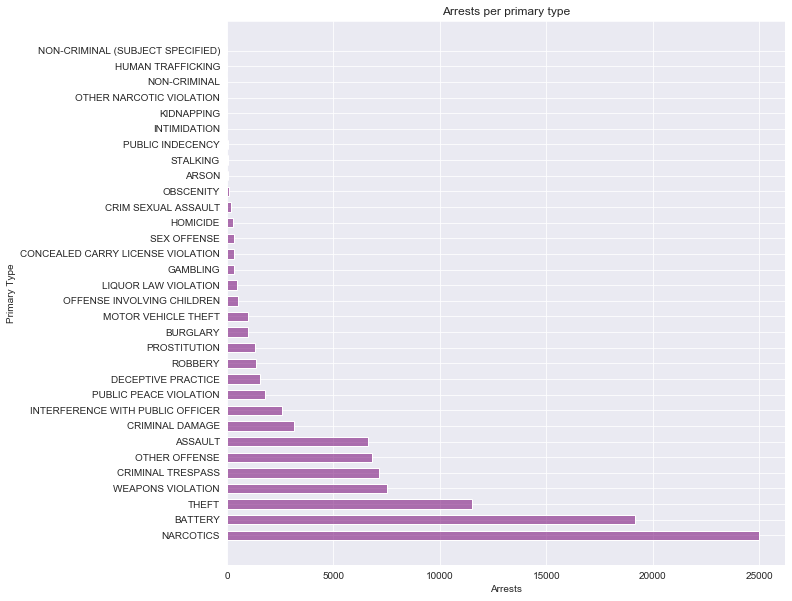

In [146]:
plt.figure(figsize=(10,10))
plt.barh(primary_type,arrest_true,height=0.6,color = (0.5,0.1,0.5,0.6))
plt.title('Arrests per primary type')
plt.xlabel('Arrests')
plt.ylabel('Primary Type')
plt.yticks(primary_type,fontsize=10)
plt.show()

In [147]:
month=merge[merge['Arrest']==1]['Month'].value_counts().sort_index().index.tolist()
arrest_true_m=merge[merge['Arrest']==1]['Month'].value_counts().sort_index().tolist()

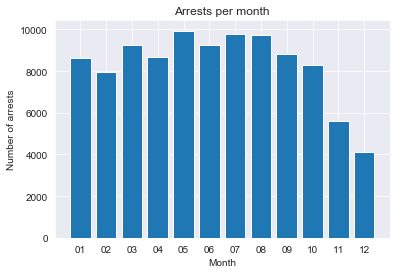

In [148]:
plt.bar(month,arrest_true_m)
plt.title('Arrests per month')
plt.xlabel('Month')
plt.ylabel('Number of arrests')
plt.show()

In [149]:
nocrime=merge[merge['Arrest']==0]['Month'].value_counts().sort_index().index.tolist()
arrest_true_m=merge[merge['Arrest']==0]['Month'].value_counts().sort_index().tolist()

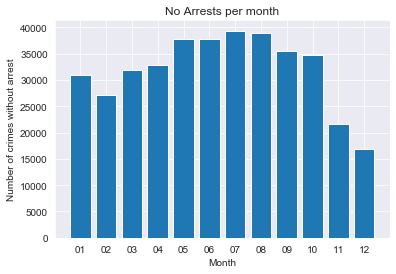

In [150]:
plt.bar(nocrime,arrest_true_m)
plt.title('No Arrests per month')
plt.xlabel('Month')
plt.ylabel('Number of crimes without arrest')
plt.show()

In [151]:
arrest_true_m
crimes=merge['Location Description'].value_counts().tolist()
location=merge['Location Description'].value_counts().index.tolist()
crimes[0:15]

[108171,
 80271,
 63623,
 38880,
 19643,
 14179,
 13276,
 13215,
 9447,
 9273,
 8977,
 8732,
 8575,
 6939,
 6731]

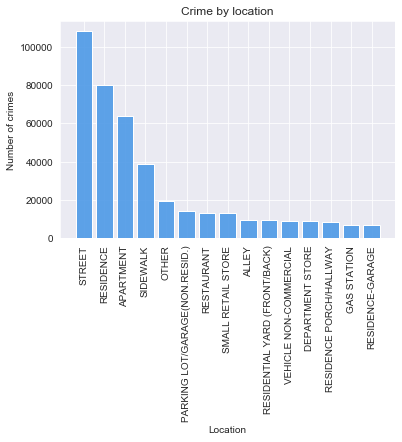

In [152]:
plt.bar(location[0:15],crimes[0:15],color = (0.3,0.6,0.9,0.9))
plt.title('Crime by location')
plt.xlabel('Location')
plt.ylabel('Number of crimes')
plt.xticks(location[0:15],rotation=90)
plt.show()

In [153]:
location=merge[merge['Arrest']==1]['Location Description'].value_counts().index.tolist()
arrest_loc=merge[merge['Arrest']==1]['Location Description'].value_counts().tolist()

In [154]:
location[0:15]

['STREET',
 'SIDEWALK',
 'APARTMENT',
 'RESIDENCE',
 'DEPARTMENT STORE',
 'ALLEY',
 'GROCERY FOOD STORE',
 'SMALL RETAIL STORE',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'GAS STATION',
 'VEHICLE NON-COMMERCIAL',
 'RESTAURANT',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'OTHER',
 'RESIDENCE PORCH/HALLWAY']

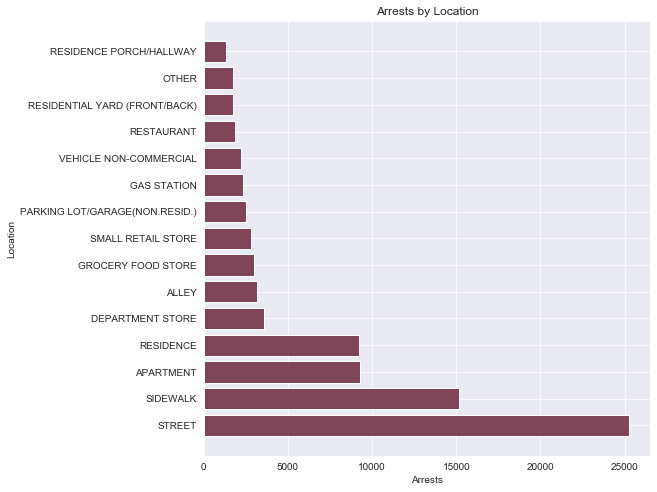

In [173]:
plt.figure(figsize=(8,8))
plt.barh(location[0:15],arrest_loc[0:15],height=0.8,color = (0.4,0.1,0.2,0.8))
plt.title('Arrests by Location')
plt.xlabel('Arrests')
plt.ylabel('Location')
plt.yticks(location[0:15],fontsize=10)
plt.show()

In [156]:
seasons = {'12':'Winter','01':'Winter', '02' : 'Winter',
          '03' : 'Spring', '04' : 'Spring', '05' : 'Spring',
          '06' : 'Summer', '07' : 'Summer', '08' : 'Summer',
          '09': 'Autumn', '10' : 'Autumn' , '11' : 'Autumn'}
merge['Season'] = merge['Month'].apply(lambda x : seasons[x])
merge.head(6)

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,p_dname,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,South Chicago,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,08,27,Summer
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,Englewood,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,09,27,Autumn
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,04,27,Spring
5,2,13,JB287512,01/06/2018,053XX S LAKE PARK AVE,0460,BATTERY,SIMPLE,STREET,0,...,Wentworth,1175864.837,1871153.753,41.801811,-87.630560,11845.876304,03:00:00,01,06,Winter


In [157]:
merge=merge[merge['Primary Type'] != 'NON-CRIMINAL']
merge=merge[merge['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)']
merge=merge[merge['Primary Type'] != 'HUMAN TRAFFICKING']


In [158]:
primary_type=merge[merge['Arrest']==1]['Primary Type'].value_counts().index.tolist()
arrest_true=merge[merge['Arrest']==1]['Primary Type'].value_counts().tolist()

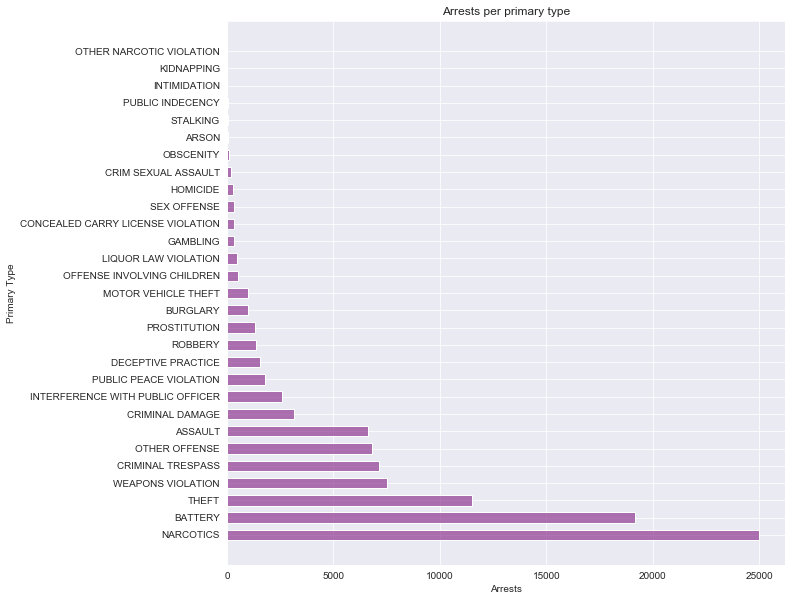

In [159]:
plt.figure(figsize=(10,10))
plt.barh(primary_type,arrest_true,height=0.6,color = (0.5,0.1,0.5,0.6))
plt.title('Arrests per primary type')
plt.xlabel('Arrests')
plt.ylabel('Primary Type')
plt.yticks(primary_type,fontsize=10)
plt.show()

In [160]:
crimeGroups = {'NARCOTICS' : '3', 'BATTERY' : '1', 'THEFT':'2', 'WEAPONS VIOLATION': '5', 'CRIMINAL TRESPASS' : '2',
'OTHER OFFENSE' : '4','ASSAULT' : '1','CRIMINAL DAMAGE' : '2',
'INTERFERENCE WITH PUBLIC OFFICER' : '1',
'PUBLIC PEACE VIOLATION' : '1',
'DECEPTIVE PRACTICE' : '3',
'ROBBERY' : '2',
'PROSTITUTION' : '3',
'BURGLARY' : '2',
'MOTOR VEHICLE THEFT' : '3',
'OFFENSE INVOLVING CHILDREN' : '3',
'LIQUOR LAW VIOLATION' : '3',
'CONCEALED CARRY LICENSE VIOLATION' : '5',
'GAMBLING' : '3',
'SEX OFFENSE' : '1',
'HOMICIDE' : '1',
'CRIM SEXUAL ASSAULT' : '1',
'OBSCENITY' : '1',
'ARSON' : '2',
'STALKING' : '1',
'PUBLIC INDECENCY' : '3',
'INTIMIDATION' : '1',
'KIDNAPPING': '1',
'OTHER NARCOTIC VIOLATION' : '3'}

merge['crimeGroups'] = merge['Primary Type'].apply(lambda x : crimeGroups[x])
merge.head(6)
# Personal crime = physical or mental to there person = 1
# Property crimes = Property involved [Robbery, arson] = 2
# Crime against morality = drugs, prostitutions, gambling = 3
# Other = 4
# Firearms = 5

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,08,27,Summer,3
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,09,27,Autumn,2
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,04,27,Spring,1
5,2,13,JB287512,01/06/2018,053XX S LAKE PARK AVE,0460,BATTERY,SIMPLE,STREET,0,...,1175864.837,1871153.753,41.801811,-87.630560,11845.876304,03:00:00,01,06,Winter,1


In [169]:
season=merge[merge['Arrest']==1]['Season'].value_counts().sort_index().index.tolist()
arrest_true_m=merge[merge['Arrest']==1]['Season'].value_counts().sort_index().tolist()

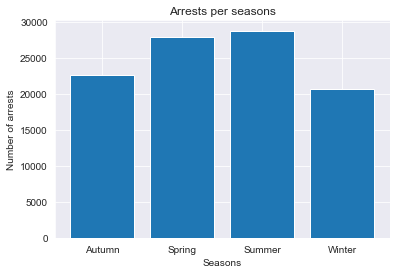

In [170]:
plt.bar(season,arrest_true_m)
plt.title('Arrests per seasons')
plt.xlabel('Seasons')
plt.ylabel('Number of arrests')
plt.show()

In [163]:
crimenGroups=merge[merge['Arrest'] == 0 ]['crimeGroups'].value_counts().sort_index().index.tolist()
arrest_false_m=merge[merge['Arrest'] == 0]['crimeGroups'].value_counts().sort_index().tolist()

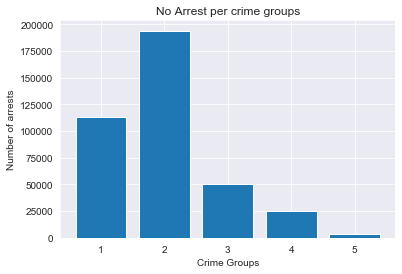

In [164]:
plt.bar(crimenGroups,arrest_false_m)
plt.title('No Arrest per crime groups')
plt.xlabel('Crime Groups')
plt.ylabel('Number of arrests')
plt.show()

In [165]:
crimenGroups=merge[merge['Arrest'] == 1 ]['crimeGroups'].value_counts().sort_index().index.tolist()
arrest_true_m=merge[merge['Arrest'] == 1]['crimeGroups'].value_counts().sort_index().tolist()

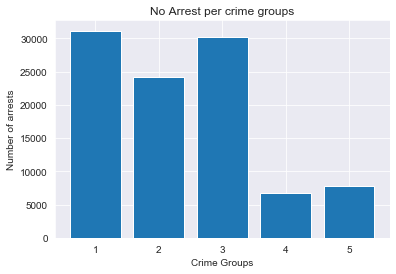

In [166]:
plt.bar(crimenGroups,arrest_true_m)
plt.title('No Arrest per crime groups')
plt.xlabel('Crime Groups')
plt.ylabel('Number of arrests')
plt.show()

In [167]:
merge.to_csv('Merge.csv',index=None)